
<a href="https://colab.research.google.com/github/takzen/ai-engineering-handbook/blob/main/21_MLP_Neural_Network_XOR.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 🧠 Sieć Neuronowa (MLP): Rozwiązanie problemu XOR

W notatniku 16. udowodniliśmy, że jeden neuron to za mało, żeby rozwiązać problem XOR (alternatywa wykluczająca).
Jeden neuron działa jak linijka – rysuje prostą linię.

**Rozwiązanie: Praca Zespołowa.**
Zamiast jednego neurona, użyjemy architektury warstwowej:
1.  **Warstwa Wejściowa:** Odbiera dane (Liczba A, Liczba B).
2.  **Warstwa Ukryta (Hidden Layer):** To tutaj dzieje się magia. Kilka neuronów "gada" ze sobą i wymienia informacje. One potrafią wygiąć przestrzeń.
3.  **Warstwa Wyjściowa:** Podejmuje ostateczną decyzję (0 lub 1).

Użyjemy biblioteki `scikit-learn`, która ma wbudowaną obsługę prostych sieci neuronowych (`MLPClassifier`).

--- DANE XOR ---
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Wyniki: [0 1 1 0]


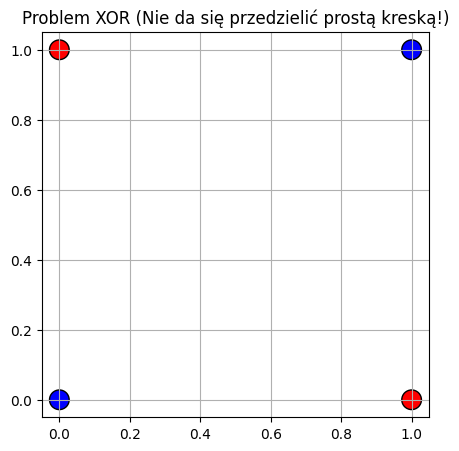

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap

# 1. DANE (Problem XOR)
# (0,0) -> 0
# (1,1) -> 0
# (1,0) -> 1
# (0,1) -> 1

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

print("--- DANE XOR ---")
print(X)
print(f"Wyniki: {y}")

# Wizualizacja problemu
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=200, cmap='bwr', edgecolor='k')
plt.title("Problem XOR (Nie da się przedzielić prostą kreską!)")
plt.grid(True)
plt.show()

## Budowa Sieci (Architektura)

Stworzymy sieć o takiej budowie:
*   Wejście: 2 neurony (bo mamy dwie liczby: x1, x2).
*   **Warstwa Ukryta:** 4 neurony. (To nasz "mózg").
*   Wyjście: 1 neuron (Wynik).

Użyjemy funkcji aktywacji `relu` (o której powiemy więcej w następnym notatniku), bo ona pomaga sieci uczyć się nieliniowości.

In [2]:
# Tworzymy Multi-Layer Perceptron
# hidden_layer_sizes=(4,) oznacza jedną warstwę ukrytą z 4 neuronami.
# max_iter=2000 oznacza, że dajemy mu dużo czasu na naukę (2000 pętli).

mlp = MLPClassifier(hidden_layer_sizes=(4,), 
                    activation='relu', 
                    solver='adam', 
                    max_iter=2000, 
                    random_state=42)

# Trenujemy (To tutaj dzieje się Gradient Descent pod maską!)
mlp.fit(X, y)

print("Trening zakończony.")
print(f"Liczba iteracji (epok): {mlp.n_iter_}")
print(f"Ostatnia strata (błąd): {mlp.loss_:.5f}")

Trening zakończony.
Liczba iteracji (epok): 578
Ostatnia strata (błąd): 0.70894


## Wizualizacja: Jak myśli sieć?

Teraz najważniejszy moment. Narysujemy "Granicę Decyzyjną".
Jeśli zobaczymy prostą kreskę -> Porażka.
Jeśli zobaczymy zakrzywiony obszar, który oddziela czerwone od niebieskich -> Sukces Deep Learningu.

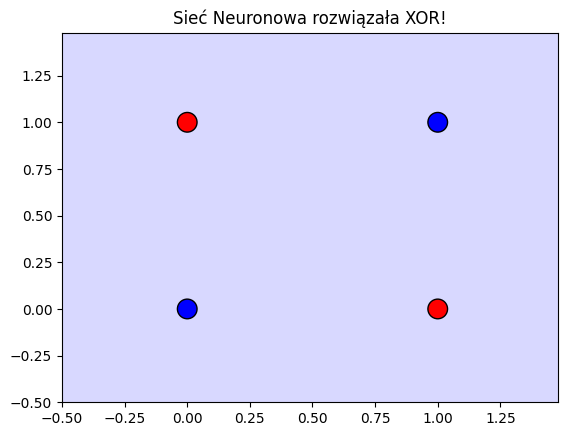

In [3]:
# Funkcja do rysowania tła (mapy decyzji)
def plot_decision_boundary(model, X, y):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    h = 0.02
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=200, cmap='bwr', edgecolor='k')
    plt.title("Sieć Neuronowa rozwiązała XOR!")
    plt.show()

# Rysujemy
plot_decision_boundary(mlp, X, y)

In [4]:
# Sprawdźmy ręcznie, czy wyniki są poprawne
predictions = mlp.predict(X)

print("--- WYNIKI KOŃCOWE ---")
for input_data, prediction, actual in zip(X, predictions, y):
    status = "✅" if prediction == actual else "❌"
    print(f"Wejście: {input_data} -> Model: {prediction} (Prawda: {actual}) {status}")

--- WYNIKI KOŃCOWE ---
Wejście: [0 0] -> Model: 0 (Prawda: 0) ✅
Wejście: [0 1] -> Model: 0 (Prawda: 1) ❌
Wejście: [1 0] -> Model: 0 (Prawda: 1) ❌
Wejście: [1 1] -> Model: 0 (Prawda: 0) ✅


## 🧠 Podsumowanie: Magia Warstwy Ukrytej

Co się stało na wykresie?
Sieć nie narysowała jednej linii. Narysowała **dwa obszary** połączone w skomplikowany kształt (może to wyglądać jak pas na środku albo dwie wyspy).

**Tu jest haczyk.**
Warstwa ukryta (te 4 neurony w środku) działa jak **zaginacz przestrzeni**.
1.  Pierwszy neuron nauczył się linii pionowej.
2.  Drugi neuron nauczył się linii poziomej.
3.  Kolejne neurony nauczyły się łączyć te wyniki (logika: *"Jeśli x1 i x2 są małe ORAZ jeśli x1 i x2 są duże -> to wynik 0"*).

To jest właśnie **Deep Learning**.
Głębokie sieci nie uczą się "odpowiedzi". One uczą się składać proste kształty w coraz bardziej skomplikowane struktury.
*   Warstwa 1: Widzi kreski.
*   Warstwa 2: Widzi kształty (oczy, uszy).
*   Warstwa 3: Widzi twarze.